<a href="https://colab.research.google.com/github/AlfonsoRafel/Posgrado-IA---UBA/blob/master/06.%20Computer%20Vision%20II/CVII_Clase_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [ ]:
#subir el archivo perros_y_gatos.zip
# está acá: https://drive.google.com/file/d/1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm/view?usp=sharing\
!gdown --id 1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm

Downloading...
From: https://drive.google.com/uc?id=1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm
To: /content/perros_y_gatos.zip
90.8MB [00:00, 176MB/s]


In [ ]:
!unzip /content/perros_y_gatos.zip > /dev/null

replace test/cats/cat.1501.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [ ]:
cd /content

/content


In [ ]:
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [ ]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob("./*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [ ]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='relu'))



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
from tensorflow.keras import optimizers

# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# utilizar model.fit_generator para entrenar
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 106s 1s/step - loss: 1.0954 - acc: 0.5721 - val_loss: 0.6416 - val_acc: 0.6460
Epoch 2/5
100/100 [==============================] - 105s 1s/step - loss: 0.7069 - acc: 0.6059 - val_loss: 0.6302 - val_acc: 0.6560
Epoch 3/5
100/100 [==============================] - 105s 1s/step - loss: 0.6506 - acc: 0.6365 - val_loss: 0.7074 - val_acc: 0.6020
Epoch 4/5
100/100 [==============================] - 105s 1s/step - loss: 0.5959 - acc: 0.6727 - val_loss: 0.5878 - val_acc: 0.7010
Epoch 5/5
100/100 [==============================] - 105s 1s/step - loss: 0.6236 - acc: 0.7169 - val_loss: 0.6500 - val_acc: 0.6800


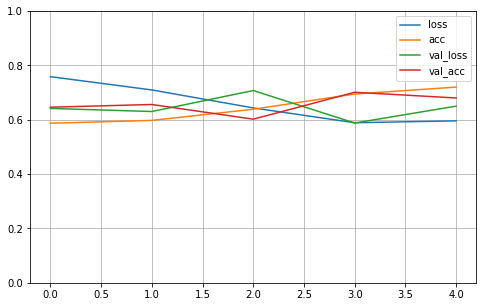

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
prediction = model.predict(validation_generator)
prediction = np.array([1 if x > 0.5 else 0 for x in prediction])

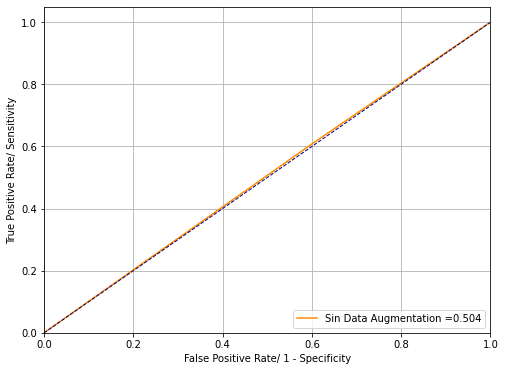

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(validation_generator.classes, prediction)
plt.plot(fpr, tpr, color='darkorange',
         label='Sin Data Augmentation ={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate/ 1 - Specificity')
plt.ylabel('True Positive Rate/ Sensitivity')
plt.show()

In [ ]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en y expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,rotation_range=50,
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

In [ ]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob(".\*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
50/50 [==============================] - 92s 2s/step - loss: 1.1354 - acc: 0.5259 - val_loss: 0.6595 - val_acc: 0.6240
Epoch 2/5
50/50 [==============================] - 77s 2s/step - loss: 0.7239 - acc: 0.5502
Epoch 3/5
50/50 [==============================] - 77s 2s/step - loss: 0.6727 - acc: 0.5806
Epoch 4/5
50/50 [==============================] - 77s 2s/step - loss: 0.6583 - acc: 0.6073
Epoch 5/5
50/50 [==============================] - 77s 2s/step - loss: 0.6526 - acc: 0.6086


In [ ]:
prediction = model.predict(validation_generator)
prediction = np.array([1 if x > 0.5 else 0 for x in prediction])

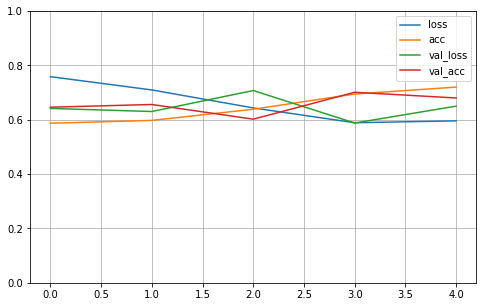

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

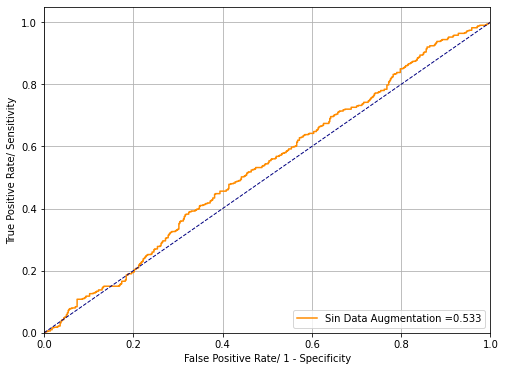

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(validation_generator.classes, model.predict(validation_generator))
plt.plot(fpr, tpr, color='darkorange',
         label='Sin Data Augmentation ={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate/ 1 - Specificity')
plt.ylabel('True Positive Rate/ Sensitivity')
plt.show()

In [ ]:
keras.backend.clear_session
del model

# Implementación de LeNet-5 y utilizarla en MNIST

In [ ]:
%%capture
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import layers
from keras import models
from keras import activations
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
!pip install funpymodeling
from keras.utils.np_utils import to_categorical

In [ ]:
# Model configuration
img_width, img_height = 28, 28
initial_dimension = img_width * img_height #784
validation_split = 0.2
verbosity = 1
encoded_dim = 50

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [ ]:
# Reshape data
input_train = input_train.reshape(input_train.shape[0], 28, 28, 1)
input_test = input_test.reshape(input_test.shape[0], 28, 28, 1)

# Add padding

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Output/Labels
target_train_cat = to_categorical(target_train)
target_test_cat = to_categorical(target_test)

In [ ]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [ ]:
def LeNet5_1():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5,5), strides=1,  activation='tanh', input_shape=(32,32)))
    model.add(layers.AveragePooling2D((2,2), strides=2))
    #model.add(activations.tanh)
    model.add(layers.Conv2D(16, (5,5), strides=1,  activation='tanh'))
    model.add(layers.AveragePooling2D((2,2), strides=2))
    #model.add(activations.tanh)
    model.add(layers.Conv2D(120, (5,5), strides=1,  activation='tanh'))
    #model.add(activations.tanh)
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(RBFLayer(10, gamma=1))
    return model

In [ ]:
def LeNet5_2():
  model = keras.Sequential()
  model.add(layers.InputLayer(input_shape=(28, 28, 1)))
  model.add(layers.ZeroPadding2D(((2, 2), (2, 2))))
  model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh'))
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))
  model.add(layers.Activation('tanh'))
  model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))
  model.add(layers.Activation('tanh'))
  model.add(layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'))
  model.add(layers.Flatten())
  model.add(layers.Dense(units=84, activation='tanh'))
  model.add(layers.Dense(units=10, activation = 'softmax'))
  return model

In [ ]:
model = LeNet5_2()
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_6 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_17 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_18 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
activation_8 (Activation)    (None, 5, 5, 16)        

In [ ]:
train_generator = ImageDataGenerator().flow(input_train, target_train_cat, batch_size=128)
test_generator = ImageDataGenerator().flow(input_test, target_test_cat, batch_size=128)

In [ ]:
model.fit_generator(train_generator, epochs=10, 
                    validation_data=test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
469/469 [==============================] - 31s 66ms/step - loss: 0.3903 - acc: 0.4048 - val_loss: 0.1616 - val_acc: 0.8228
Epoch 2/10
469/469 [==============================] - 30s 65ms/step - loss: 0.1429 - acc: 0.8348 - val_loss: 0.0998 - val_acc: 0.8887
Epoch 3/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0946 - acc: 0.8854 - val_loss: 0.0736 - val_acc: 0.9101
Epoch 4/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0720 - acc: 0.9066 - val_loss: 0.0590 - val_acc: 0.9223
Epoch 5/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0582 - acc: 0.9196 - val_loss: 0.0494 - val_acc: 0.9314
Epoch 6/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0498 - acc: 0.9280 - val_loss: 0.0428 - val_acc: 0.9419
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0426 - acc: 0.9376 - val_loss: 0.0376 - val_acc: 0.9474
Epoch 8/10
469/469 [==============================] - 30s 65ms